In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
import pandas as pd
data = pd.read_csv("Downloads\spamdataset\spam.csv")
data

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


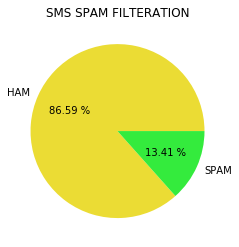

In [3]:
HAM = data[data["class"]=="ham"].count()[0]
SPAM = data[data["class"]=="spam"].count()[0]

label = ["HAM" , "SPAM"]
colour = ["#ebdc34" , "#34eb3d"]

plt.title("SMS SPAM FILTERATION")

plt.pie([HAM , SPAM] , labels = label ,colors = colour , autopct = "%.2f %%")
plt.show()

In [4]:
a=data["class"]
a

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: class, Length: 5572, dtype: object

In [5]:
a.replace("spam","0",inplace=True)
a

0       ham
1       ham
2         0
3       ham
4       ham
       ... 
5567      0
5568    ham
5569    ham
5570    ham
5571    ham
Name: class, Length: 5572, dtype: object

In [6]:
a.replace("ham","1",inplace=True)
a

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: class, Length: 5572, dtype: object

In [7]:
ham = data[data["class"]=="1"].count()
ham

class         4825
message       4825
Unnamed: 2      45
Unnamed: 3      10
Unnamed: 4       6
dtype: int64

In [8]:
spam = data[data["class"]=="0"].count()
spam

class         747
message       747
Unnamed: 2      5
Unnamed: 3      2
Unnamed: 4      0
dtype: int64

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize


In [11]:
def puncation(message):
    tokens = word_tokenize(message)
    words = [word for word in tokens if word.isalpha()]
    words=" ".join(words)
    return words
data['message']=data['message'].apply(puncation)
data['message']

0       Go until jurong point Available only in bugis ...
1                                 Ok lar Joking wif u oni
2       Free entry in a wkly comp to win FA Cup final ...
3             U dun say so early hor U c already then say
4       Nah I do think he goes to usf he lives around ...
                              ...                        
5567    This is the time we have tried contact U have ...
5568                    Will b going to esplanade fr home
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i b...
5571                            Rofl Its true to its name
Name: message, Length: 5572, dtype: object

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def restop(message):
    tokens = word_tokenize(message)
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if not word in stop_words]
    words=" ".join(words)
    return words
data["message"]=data["message"].apply(restop)
data["message"]

0       Go jurong point Available bugis n great world ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts May...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5567    This time tried contact U Pound prize claim ea...
5568                       Will b going esplanade fr home
5569                             Pity mood So suggestions
5570    The guy bitching I acted like interested buyin...
5571                                   Rofl Its true name
Name: message, Length: 5572, dtype: object

In [14]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
def lemma(message):
    new = []
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(message)
    lem_words = [lemmatizer.lemmatize(x) for x in tokens]
    lem_words=" ".join(lem_words)
    return lem_words
data['message']=data['message'].apply(lemma)
data['message']

0       Go jurong point Available bugis n great world ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts May...
3                     U dun say early hor U c already say
4                   Nah I think go usf life around though
                              ...                        
5567    This time tried contact U Pound prize claim ea...
5568                       Will b going esplanade fr home
5569                              Pity mood So suggestion
5570    The guy bitching I acted like interested buyin...
5571                                   Rofl Its true name
Name: message, Length: 5572, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [17]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,Go jurong point Available bugis n great world ...,NaN,NaN,NaN
1,1,Ok lar Joking wif u oni,NaN,NaN,NaN
2,0,Free entry wkly comp win FA Cup final tkts May...,NaN,NaN,NaN
3,1,U dun say early hor U c already say,NaN,NaN,NaN
4,1,Nah I think go usf life around though,NaN,NaN,NaN


In [87]:
X_train , X_test , y_train , y_test = train_test_split(data["message"] , data["class"] , random_state = 22)

In [88]:
tfidf_vectorizer=TfidfVectorizer()

X_train=tfidf_vectorizer.fit_transform(X_train) 

X_test=tfidf_vectorizer.transform(X_test)

In [106]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

In [107]:
svc=SVC()

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

score = accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
#86.25

Accuracy: 97.63%


In [99]:
nb=MultinomialNB()

nb.fit(X_train,y_train)

y_pred=nb.predict(X_test)

score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
#83.12
#78.12

Accuracy: 95.98%


In [100]:
pac=PassiveAggressiveClassifier()

pac.fit(X_train,y_train)

y_pred=pac.predict(X_test)

score=accuracy_score(y_test,y_pred)


print(f'Accuracy: {round(score*100,2)}%')
#87.5
#83.75

Accuracy: 98.42%


In [101]:
rfc=RandomForestClassifier(max_depth=2,random_state=0)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
#75.0
#55

Accuracy: 86.58%


In [102]:
dtc=DecisionTreeClassifier(max_depth=2,random_state=0)

dtc.fit(X_train,y_train)

y_pred=dtc.predict(X_test)

score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
#67
#61

Accuracy: 92.39%


In [55]:
!pip install xgboost

In [103]:
from xgboost import XGBClassifier
xgb= XGBClassifier()

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')
#76

Accuracy: 96.48%
